In [1]:
from MemSE import ROOT
import torch
save_path = ROOT / 'experiments/conference_2/results/ga_evals.pth'
results = torch.load(save_path)

/home/sebwood/projects/def-franlp/sebwood/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


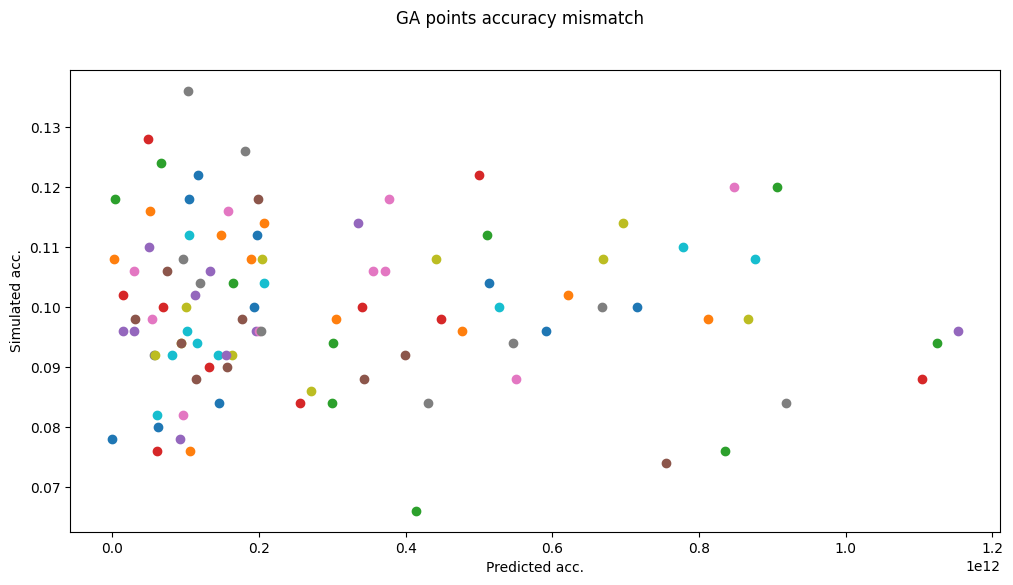

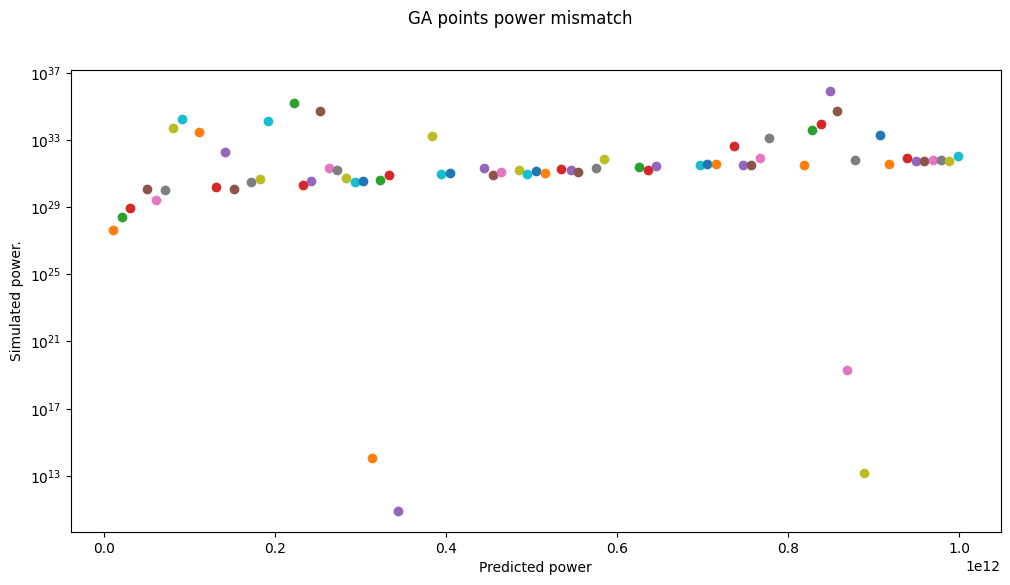

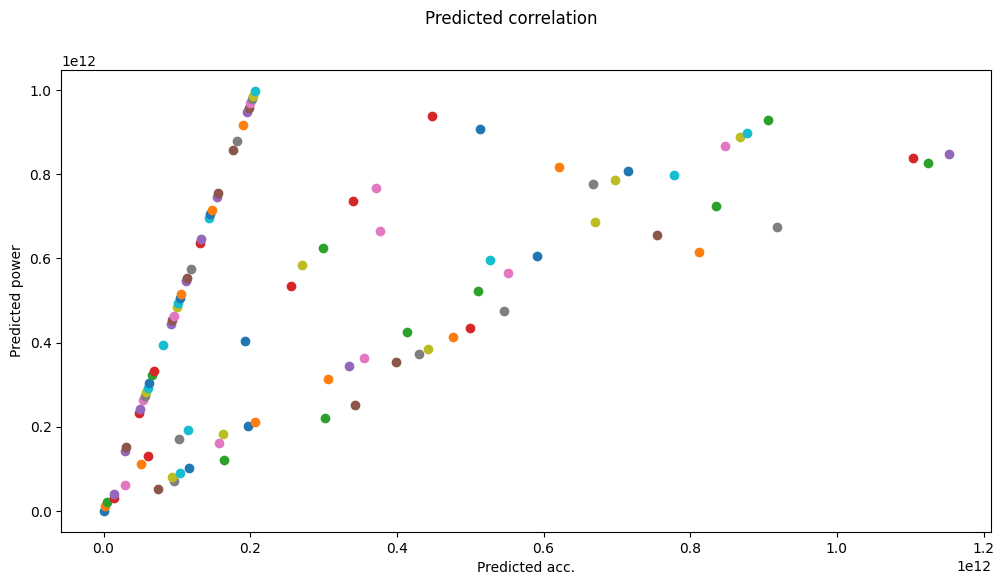

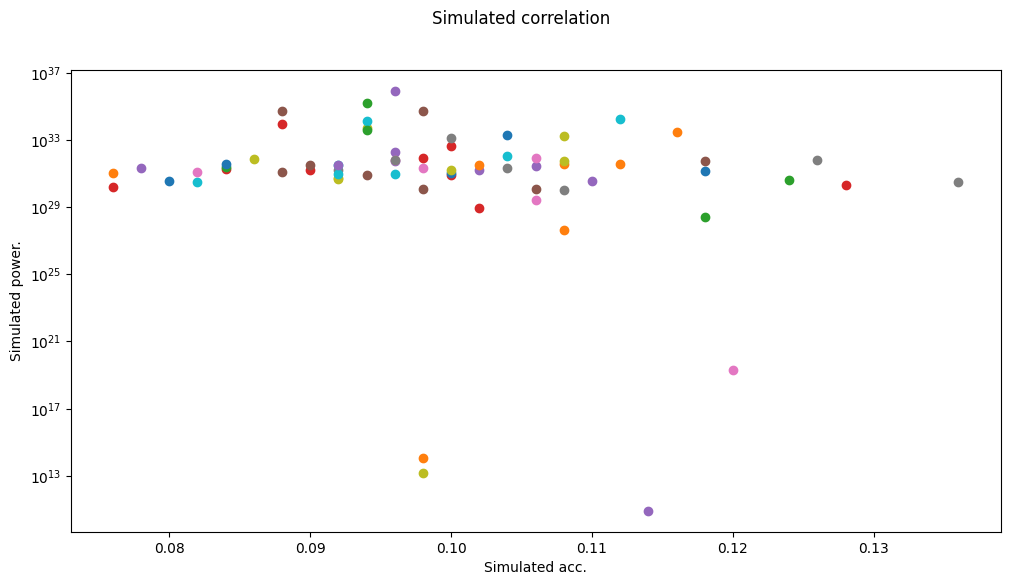

In [10]:
import matplotlib.pyplot as plt

fig_accacc, ax_accacc = plt.subplots(figsize=(12,6))
fig_accacc.suptitle('GA points accuracy mismatch')
ax_accacc.set_xlabel('Predicted acc.')
ax_accacc.set_ylabel('Simulated acc.')
fig_powpow, ax_powpow = plt.subplots(figsize=(12,6))
fig_powpow.suptitle('GA points power mismatch')
ax_powpow.set_xlabel('Predicted power')
ax_powpow.set_ylabel('Simulated power.')
ax_powpow.set_yscale('log')
fig_accpowp, ax_accpowp = plt.subplots(figsize=(12,6))
fig_accpowp.suptitle('Predicted correlation')
ax_accpowp.set_xlabel('Predicted acc.')
ax_accpowp.set_ylabel('Predicted power')
fig_accpows, ax_accpows = plt.subplots(figsize=(12,6))
fig_accpows.suptitle('Simulated correlation')
ax_accpows.set_xlabel('Simulated acc.')
ax_accpows.set_ylabel('Simulated power.')
ax_accpows.set_yscale('log')
for c, r in results.items():
    ax_accacc.scatter(r['acc'][0], r['acc'][1], label=c)
    ax_powpow.scatter(r['pow'][0], r['pow'][1], label=c)
    ax_accpowp.scatter(r['acc'][0], r['pow'][0], label=c)
    ax_accpows.scatter(r['acc'][1], r['pow'][1], label=c)
plt.show()

In [ ]:
# tSNE of Gmax
from MemSE.nas import AccuracyDataset, ResNetArchEncoder, AccuracyPredictor, EvolutionFinder
save_path = ROOT / 'experiments/conference_2/results'
dset = AccuracyDataset(save_path)
encoder = ResNetArchEncoder()
tloader, vloader, bacc, bpow = dset.build_acc_data_loader(encoder)